# 线性回归
**refer to:[aymericdamien](https://github.com/aymericdamien/TensorFlow-Examples)**

In [20]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [21]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [22]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [23]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [24]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [25]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [26]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.149571583 W= 0.400279 b= -0.282557
Epoch: 0100 cost= 0.141182303 W= 0.391317 b= -0.218085
Epoch: 0150 cost= 0.133762002 W= 0.382889 b= -0.157448
Epoch: 0200 cost= 0.127198815 W= 0.374961 b= -0.100417
Epoch: 0250 cost= 0.121393740 W= 0.367505 b= -0.0467775
Epoch: 0300 cost= 0.116259225 W= 0.360492 b= 0.00367164
Epoch: 0350 cost= 0.111717902 W= 0.353896 b= 0.0511203
Epoch: 0400 cost= 0.107701257 W= 0.347693 b= 0.0957469
Epoch: 0450 cost= 0.104148693 W= 0.341858 b= 0.13772
Epoch: 0500 cost= 0.101006642 W= 0.336371 b= 0.177196
Epoch: 0550 cost= 0.098227657 W= 0.33121 b= 0.214324
Epoch: 0600 cost= 0.095769837 W= 0.326356 b= 0.249245
Epoch: 0650 cost= 0.093596078 W= 0.32179 b= 0.282088
Epoch: 0700 cost= 0.091673553 W= 0.317496 b= 0.312978
Epoch: 0750 cost= 0.089973338 W= 0.313458 b= 0.342031
Epoch: 0800 cost= 0.088469662 W= 0.30966 b= 0.369356
Epoch: 0850 cost= 0.087139815 W= 0.306087 b= 0.395056
Epoch: 0900 cost= 0.085963793 W= 0.302727 b= 0.419227
Epoch: 0950 cost= 0.08

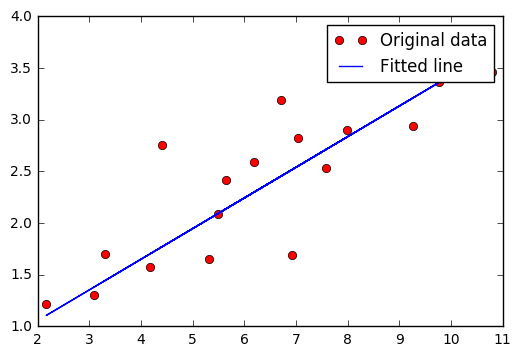

In [27]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

# 逻辑回归

In [28]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./../mnist/MNIST_data/", one_hot=True)

Extracting ./../mnist/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./../mnist/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./../mnist/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./../mnist/MNIST_data/t10k-labels-idx1-ubyte.gz


In [29]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

tf.reset_default_graph()
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [30]:
# Launch the graph

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)

    print "Optimization Finished!"

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print "Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]})

Epoch: 0001 cost= 1.183512046
Epoch: 0002 cost= 0.665131407
Epoch: 0003 cost= 0.552773576
Epoch: 0004 cost= 0.498613203
Epoch: 0005 cost= 0.465471415
Epoch: 0006 cost= 0.442562632
Epoch: 0007 cost= 0.425492960
Epoch: 0008 cost= 0.412210824
Epoch: 0009 cost= 0.401339370
Epoch: 0010 cost= 0.392430384
Epoch: 0011 cost= 0.384736330
Epoch: 0012 cost= 0.378219635
Epoch: 0013 cost= 0.372398418
Epoch: 0014 cost= 0.367269924
Epoch: 0015 cost= 0.362773805
Epoch: 0016 cost= 0.358598079
Epoch: 0017 cost= 0.354867594
Epoch: 0018 cost= 0.351465846
Epoch: 0019 cost= 0.348317823
Epoch: 0020 cost= 0.345413072
Epoch: 0021 cost= 0.342736835
Epoch: 0022 cost= 0.340234069
Epoch: 0023 cost= 0.337913680
Epoch: 0024 cost= 0.335736807
Epoch: 0025 cost= 0.333706310
Optimization Finished!
Accuracy: 0.889333
